# 1) Perform Explanatory Data Analysis (EDA) / indicate how features correlate among themselves, with emphasis to the target/label one.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys

In [2]:
df = pd.read_csv(r'C:\Users\dimit\Downloads\heart_failure_clinical_records_dataset.csv')
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


No null values here

In [4]:
df.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

<AxesSubplot:>

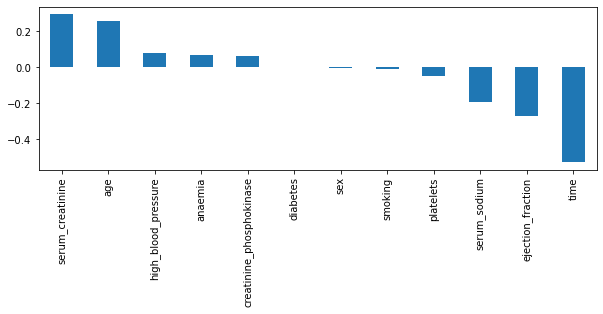

In [5]:
plt.figure(figsize = (10, 3))
df.corr()["DEATH_EVENT"].sort_values(ascending = False)[1:].plot(kind = "bar")

Time seems to be the most (negatively) correlate to the target variable death event. Thhis means that the longer the follow up period, the less likely it is for a patient who suffered a heart failure to die. We can clearly see here that correlation does not imply causation (ie a longer follow up period does not actually reduces the chance for a patient do to die). One possible explanation here would be that if a doctor see that a patient is healthy after the heart failure they might not ask for very tight follow up period, while if a patient is in very bad shape after the heart failure they might ask for a tight follow up period. I would say that the factor of confusion is the patient's overall health after the heart failure event here.


We can also see that serum creatine has the higest positive correlation with the target variable. This means that a higher serum creatine level in the blood translates into a higher chance for a patient who suffered a heart failure to die in the follow up period. We can also see that the age feature has a similar positive correlation on the target variable. 

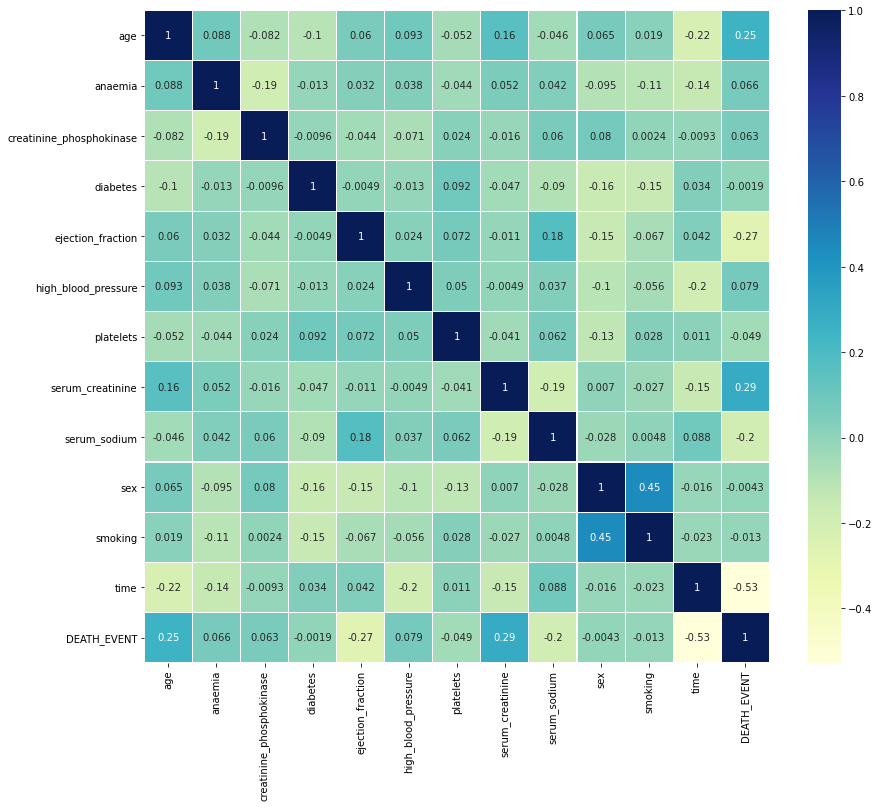

In [6]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

Looking at the correlation matrix for correlation between variable other than with the target variable, we can see that the higest possible correlation among all variables is sex and smoking, suggesting that smoking or not is stronly related to a person's gender.

We also see that serum sodium is related to ejection fraction. One interpretation could be the amount of sodium in the blood makes the percentage of blood leaving the heart at each contraction increase.

Finally, we can also see that time and age features are also positively correlated. One interpretation would be that doctors allow a larger follow up period for younger patients as they have less risk of dying after experiencing a heart failure. This interpretation would also support a previous interpretation provided above between time and death event.

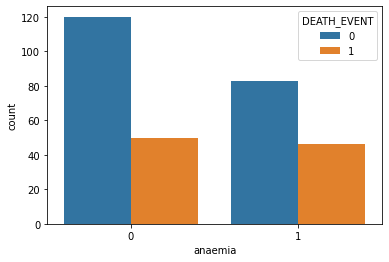

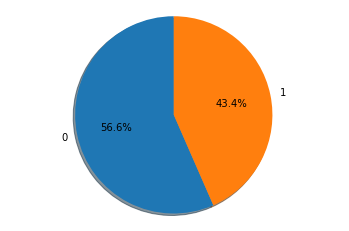

This chart represents repartition of field anaemia


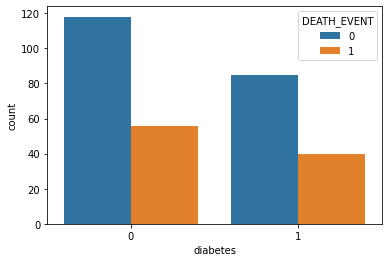

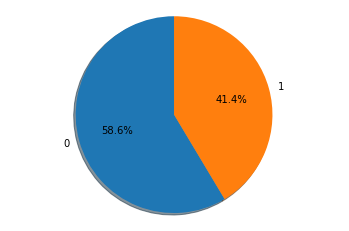

This chart represents repartition of field diabetes


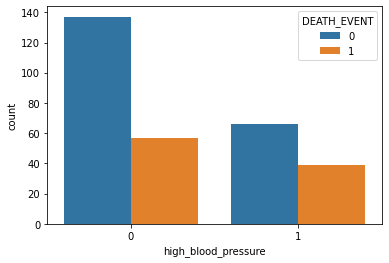

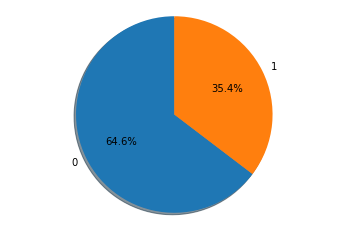

This chart represents repartition of field high_blood_pressure


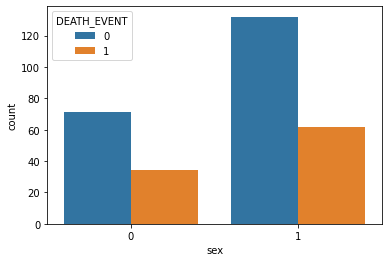

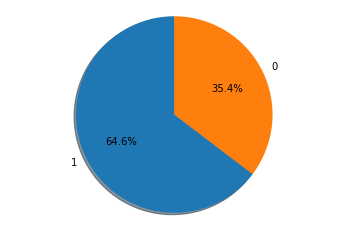

This chart represents repartition of field sex


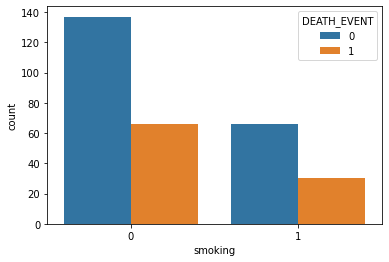

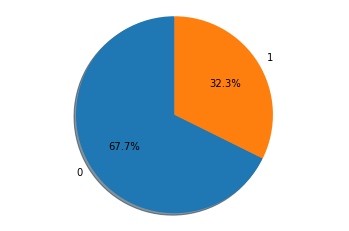

This chart represents repartition of field smoking


In [7]:
for i,column in enumerate(df.drop(columns=['DEATH_EVENT'])):
    if len(df[column].value_counts())<=5:
        plt.figure(i)
        sns.countplot(x = df[column], hue = df["DEATH_EVENT"])
        fig1, ax1 = plt.subplots()
        ax1.pie(list((100*df[column].value_counts()/len(df[column])).astype(int)), labels=list(df[column].value_counts().index), autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal')
        plt.show()
        print('This chart represents repartition of field {0}'.format(column))

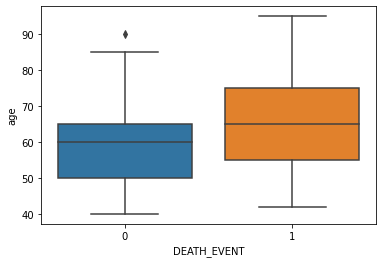

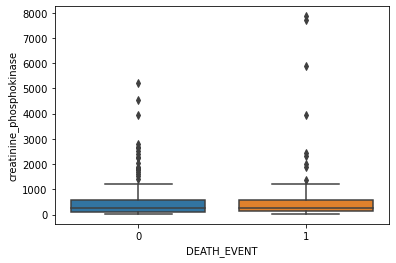

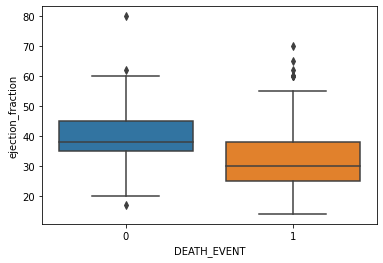

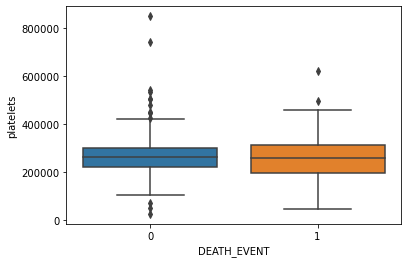

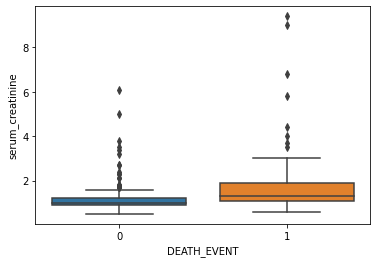

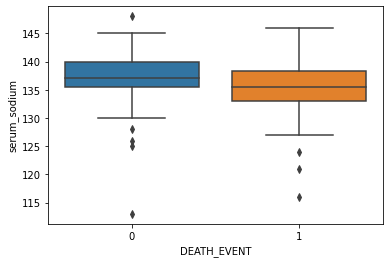

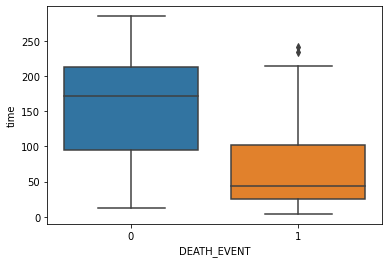

In [8]:
for i,column in enumerate(df.drop(columns=['DEATH_EVENT'])):
    if len(df[column].value_counts())>5:
        plt.figure(i)
        sns.boxplot(y = df[column],x=df["DEATH_EVENT"])

# 2/ Apply Machine Learning Modeling on the dataset using all the above 4 algorithms

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], 
                                                    test_size=0.20, 
                                                    random_state=0)
X_train.shape

(239, 12)

In [10]:
y_train.value_counts()
# sys.exit('abc')

0    166
1     73
Name: DEATH_EVENT, dtype: int64

Quite imbalanced dataset, let's resample using SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(X_train.shape)

(332, 12)


In [12]:
y_train.value_counts()

1    166
0    166
Name: DEATH_EVENT, dtype: int64

Much better

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score, roc_curve, roc_auc_score

In [14]:
classifiers = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'XGBoost':XGBClassifier(),
}

In [15]:
for classifier in classifiers:
    print(classifier)    
    print(classifiers[classifier].get_params())

LogisticRegression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
DecisionTree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
RandomForest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
XGBoos

# Tune (hyper-parameter tuning) each model by calling the GridSearchCV method.

In [16]:
parameters_dic = {'LogisticRegression':{'penalty':['l2', 'elasticnet', 'none'],
                                         "C":[1000,100, 10, 1.0, 0.1, 0.01],
                                          "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                                        },
                  'DecisionTree':{'max_features':['auto','sqrt','log2'],
#                                   'max_depth': [1,2,3,4,5,6,7,8,9,10],
                                  },
                  'RandomForest':{'bootstrap': [True,False],
#                                      'max_depth': [1,2,3,4,5,6,7,8,9,10],
                                     'n_estimators': [int(x) for x in np.linspace(1,201,10)],
                                  },
                 'XGBoost': {'eta':[0.1,0.25,0.5,0.75,1],
                            'gamma':[0.1,1,10,100,1000],
#                             'max_depth':[1,2,3,4,5,6,7,8,9,10],
                             'n_estimators': [int(x) for x in np.linspace(1,201,10)],
                            },
                 }

# Indicate which combination of Hyperparameters produces the best result.

In [17]:
# from warnings import simplefilter
# from sklearn.exceptions import ConvergenceWarning
# simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings("ignore")
for classifier in classifiers:
#         print('Fitting and training {classifier} classifier to the training data and evaluating against test set'.format(classifier = classifier))
#         gs = RandomizedSearchCV(estimator=classifiers[classifier], param_distributions=parameters_dic[classifier], 
#                       scoring=recall_score, cv=5, n_jobs=-1, random_state = 42)        
        gs = GridSearchCV(estimator=classifiers[classifier], param_grid =parameters_dic[classifier], 
                      scoring=accuracy_score, cv=5, n_jobs=-1)
        gs = gs.fit(X_train, y_train)
        if classifier == 'LogisticRegression':
            classifiers[classifier] = LogisticRegression(penalty = gs.best_params_['penalty'],
                                                       C = gs.best_params_['C'],
                                                       solver = gs.best_params_['solver'],
                                                       )
        elif classifier == 'XGBoost':
            classifiers[classifier] = XGBClassifier(eta = gs.best_params_['eta'],
                                                       gamma = gs.best_params_['gamma'],
#                                                        max_depth = gs.best_params_['max_depth'],
                                                       n_estimators = gs.best_params_['n_estimators'],
                                                    verbosity = 0,
                                                  )
        elif classifier == 'RandomForest':
            classifiers[classifier] = RandomForestClassifier(bootstrap = gs.best_params_['bootstrap'],
                                                       n_estimators = gs.best_params_['n_estimators'],
#                                                        max_depth = gs.best_params_['max_depth'],
                                                  )
        elif classifier == 'DecisionTree':
            classifiers[classifier] = DecisionTreeClassifier(max_features = gs.best_params_['max_features'],
#                                                     max_depth = gs.best_params_['max_depth'],
                                                  )
        print(f" {classifier} classifier best parameters are: {gs.best_params_}")

 LogisticRegression classifier best parameters are: {'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
 DecisionTree classifier best parameters are: {'max_features': 'auto'}
 RandomForest classifier best parameters are: {'bootstrap': True, 'n_estimators': 1}
[20:32:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 XGBoost classifier best parameters are: {'eta': 0.1, 'gamma': 0.1, 'n_estimators': 1}


In [18]:
results_df = pd.DataFrame(columns = ['Classifier','y','Grid Search','Accuracy','Precision','Recall','F1-Score'])

Fitting and training LogisticRegression classifier to the training data and evaluating against test set


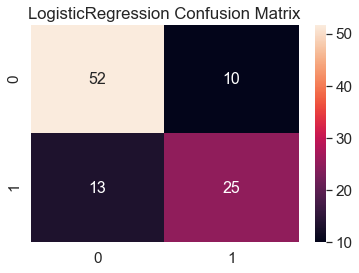

LogisticRegression(C=1000, solver='newton-cg')
Fitting and training DecisionTree classifier to the training data and evaluating against test set


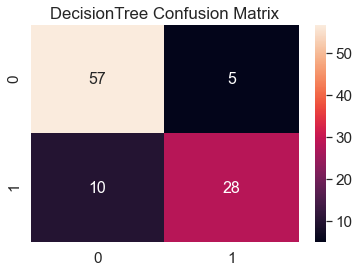

DecisionTreeClassifier(max_features='auto')
Fitting and training RandomForest classifier to the training data and evaluating against test set


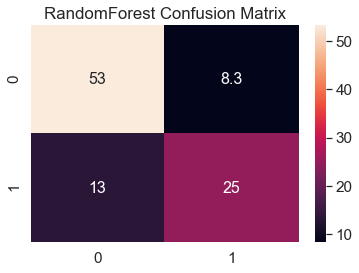

RandomForestClassifier(n_estimators=1)
Fitting and training XGBoost classifier to the training data and evaluating against test set


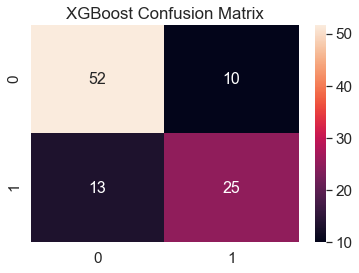

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)


In [19]:
for classifier in classifiers:
    print('Fitting and training {classifier} classifier to the training data and evaluating against test set'.format(classifier = classifier))
    classifiers[classifier].fit(X_train, y_train)
    y_pred = classifiers[classifier].predict(X_test)
    cm = (confusion_matrix(y_test,y_pred) / confusion_matrix(y_test,y_pred).astype(np.float).sum()) *100
    df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.title("{classifier} Confusion Matrix".format(classifier = classifier))
    plt.show()
    print(classifiers[classifier])
    CR = classification_report(y_test,y_pred, output_dict=True)
#     print(CR)
    CR = pd.DataFrame(CR).transpose()[:2]
    for line_number in range(0,len(CR)):
        results_df = results_df.append({'Classifier':classifier,'y':line_number,'Grid Search':'Yes',
                                       'Accuracy':accuracy_score(y_test, y_pred),'Precision':CR['precision'][line_number],
                                        'Recall':CR['recall'][line_number],'F1-Score':CR['f1-score'][line_number]
                                       },ignore_index=True)

# Note: Use accuracy and AUC-ROC metrics when evaluating your models.

In [20]:
results_df.sort_values(by=['Accuracy'], ascending=False)[(results_df['y'] == 1)]

Classifier  y Grid Search  Accuracy  Precision    Recall  F1-Score
3        DecisionTree  1         Yes  0.850000   0.850000  0.739130  0.790698
5        RandomForest  1         Yes  0.783333   0.750000  0.652174  0.697674
1  LogisticRegression  1         Yes  0.766667   0.714286  0.652174  0.681818
7             XGBoost  1         Yes  0.766667   0.714286  0.652174  0.681818

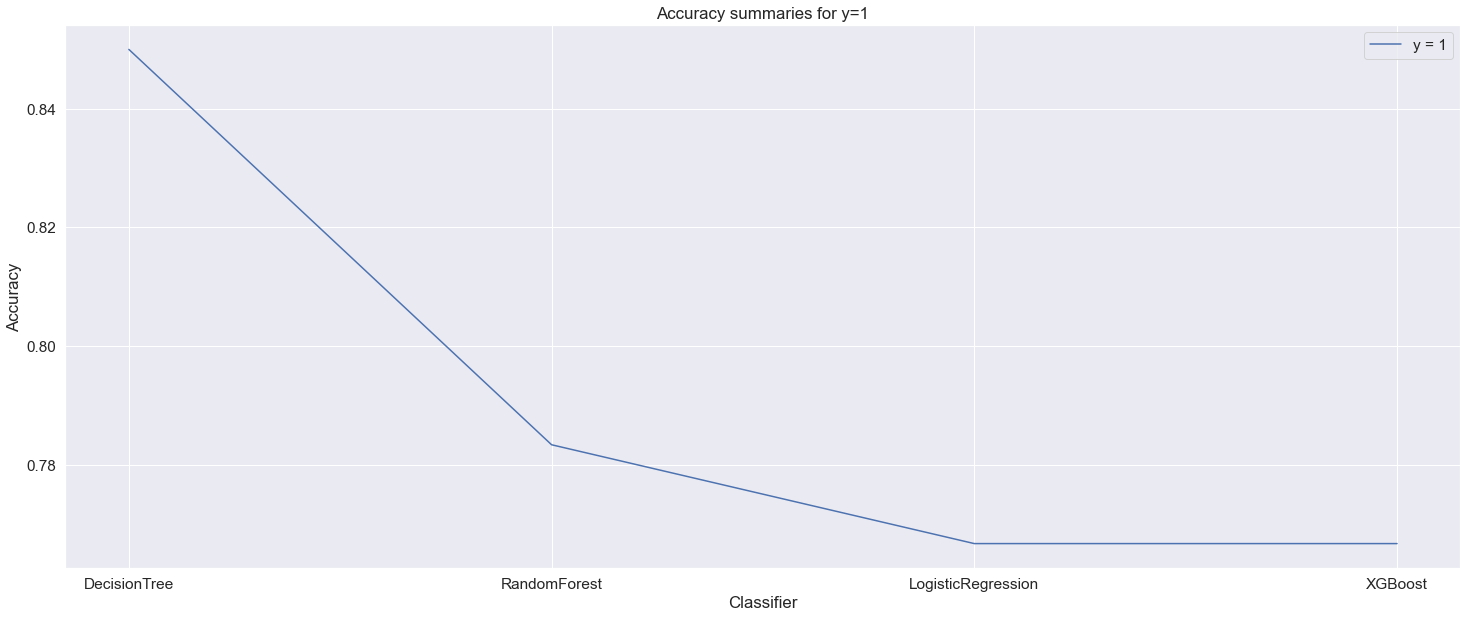

In [21]:
plt.figure(figsize=(25, 10))
plt.plot(results_df.sort_values(by=['Accuracy'], ascending=False)[(results_df['y'] == 1)]['Classifier'], results_df.sort_values(by=['Accuracy'], ascending=False)[(results_df['y'] == 1)]['Accuracy'], label = "y = 1")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.title("Accuracy summaries for y=1")
plt.show()

Here we see that the decision has the best performance when it comes to accuracy compared to all other classifiers

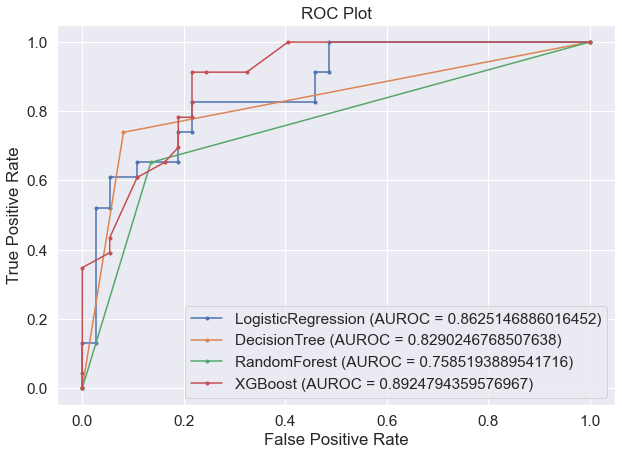

In [22]:
proba_dic = {}
roc_score_dic = {}
roc_curve_dic = {}
plt.figure(figsize=(10,7))
for classifier in classifiers:
    proba_dic[f"{classifier} proba"] = classifiers[classifier].predict_proba(X_test)[:,1]
    roc_score_dic[f"{classifier} score"] = roc_auc_score(y_test, proba_dic[f"{classifier} proba"])
    roc_curve_dic[f'{classifier} fpr'], roc_curve_dic[f'{classifier} tpr'] , _ = roc_curve(y_test, proba_dic[f"{classifier} proba"])
    plt.plot(roc_curve_dic[f'{classifier} fpr'], roc_curve_dic[f'{classifier} tpr'], marker='.', label= f'{classifier} (AUROC = {roc_score_dic[f"{classifier} score"]})')
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Assuming that we want to have a 100% TPR at 'all cost', then XGBoost classifier here is the way to go, as it reaches the 100% TPR first (ie with the lowest FPR)

# 3) Perform Machine Learning Interpretability/Explanability tasks as follows:

## 3_A) Use the 'eli5' library to interpret the "white box" model of Logistic Regression.
## Apply 'eli5' to visualize the weights associated to each feature.


In [23]:
import eli5
eli5.show_weights(classifiers["LogisticRegression"],feature_names=list(X_train.columns),show_feature_values=True)

## ## Use 'eli5' to explain specific predictions, pick a row in the test data with negative label and one with positive.

In [24]:
print(y_test.iloc[:4])

206    0
188    0
12     1
219    0
Name: DEATH_EVENT, dtype: int64


In [25]:
eli5.show_prediction(classifiers["LogisticRegression"], X_test.iloc[2],
                    feature_names=list(X_train.columns),show_feature_values=True)

In [26]:
eli5.show_prediction(classifiers["LogisticRegression"], X_test.iloc[1],
                    feature_names=list(X_train.columns),show_feature_values=True)

## 3_B) Use the 'eli5' library to interpret the "white box" model of Decision Tree.

## Apply 'eli5' to list the feature importance ordered by the highest value 

In [27]:
eli5.show_weights(classifiers["DecisionTree"],feature_names=list(X_train.columns),show_feature_values=True)

## Get an explanation for a given prediction, one positive and one negative

In [28]:
print(y_test.iloc[:5])

206    0
188    0
12     1
219    0
237    0
Name: DEATH_EVENT, dtype: int64


In [29]:
eli5.show_prediction(classifiers["DecisionTree"], X_test.iloc[0],
                    feature_names=list(X_train.columns),show_feature_values=True)

In [30]:
eli5.show_prediction(classifiers["DecisionTree"], X_test.iloc[2],
                    feature_names=list(X_train.columns),show_feature_values=True)

## 3_C) Use LIME to explain both the Random Forest and the XGBoost models.

## Create a LIME explainer by using the LimeTabularExplainer method, the main explainer to use for tabular data.

In [31]:
# pip install lime

In [32]:
import lime
import lime.lime_tabular

In [33]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode='classification',
                                                   feature_names = X_train.columns,
                                                   training_labels=y_train
                                      )

In [34]:
explainer

In [35]:
print(y_test.iloc[:15])

206    0
188    0
12     1
219    0
237    0
136    0
228    0
205    0
52     1
108    0
240    0
15     1
184    1
246    1
22     1
Name: DEATH_EVENT, dtype: int64


In [36]:
exp = explainer.explain_instance(X_train.iloc[5,:].values,
                                classifiers["XGBoost"].predict_proba,
                                 num_features = len(X_train.columns)
                                )
exp.show_in_notebook(show_table=True, show_all=True)
exp.save_to_file('lime_tabular.html')

In [37]:
exp = explainer.explain_instance(X_train.iloc[2,:].values,
                                classifiers["XGBoost"].predict_proba,
                                 num_features = len(X_train.columns)
                                )
exp.show_in_notebook(show_table=True, show_all=True)
exp.save_to_file('lime_tabular.html')

In [38]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode='classification',
                                                   feature_names = X_train.columns,
                                                   training_labels=y_train
                                      )

In [39]:
exp = explainer.explain_instance(X_train.iloc[5,:].values,
                                classifiers["RandomForest"].predict_proba,
                                 num_features = len(X_train.columns)
                                )
exp.show_in_notebook(show_table=True, show_all=True)
exp.save_to_file('lime_tabular.html')

In [40]:
exp = explainer.explain_instance(X_train.iloc[2,:].values,
                                classifiers["RandomForest"].predict_proba,
                                 num_features = len(X_train.columns)
                                )
exp.show_in_notebook(show_table=True, show_all=True)
exp.save_to_file('lime_tabular.html')

## 3_D) Use SHAP library to interpret the XGBoost model. Specifically, call the TreeExplainer method of SHAP, TreeExplainer is optimized for tree based models.

In [41]:
X_train.head(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  81.0        0                      4540         0                 35   
1  50.0        0                       185         0                 30   
2  45.0        0                       582         0                 35   
3  52.0        0                       190         1                 38   
4  50.0        1                        54         0                 40   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   231000.0              1.18           137    1   
1                    0   266000.0              0.70           141    1   
2                    0   385000.0              1.00           145    1   
3                    0   382000.0              1.00           140    1   
4                    0   279000.0              0.80           141    1   

   smoking  time  
0        1   107  
1        1   112  
2        0    61  
3        1   258  
4        0   250

In [42]:
print(classifiers)

{'LogisticRegression': LogisticRegression(C=1000, solver='newton-cg'), 'DecisionTree': DecisionTreeClassifier(max_features='auto'), 'RandomForest': RandomForestClassifier(n_estimators=1), 'XGBoost': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)}


In [43]:
import shap
explainer = shap.TreeExplainer(model=classifiers["XGBoost"])
shap_values = explainer.shap_values(X_train)

In [44]:
explainer

In [45]:
print(type(shap_values))
print(len(shap_values))
print(len(X_train.columns))
print(shap_values)

<class 'numpy.ndarray'>
332
12
[[ 6.5346859e-02  0.0000000e+00  3.5796355e-02 ... -2.7755057e-03
   0.0000000e+00 -5.6517847e-02]
 [-2.8307069e-02  0.0000000e+00 -1.4625548e-03 ... -2.7755057e-03
   0.0000000e+00 -6.9202565e-02]
 [-1.2456805e-02  0.0000000e+00  1.3685882e-02 ... -1.4787109e-03
   0.0000000e+00  1.9620241e-01]
 ...
 [ 5.9345708e-05  0.0000000e+00  1.4144382e-02 ...  1.4787109e-03
   0.0000000e+00  1.4760745e-01]
 [-1.1653031e-02  0.0000000e+00  5.6436202e-03 ...  9.3967458e-03
   0.0000000e+00  1.3792509e-01]
 [-1.2557519e-03  0.0000000e+00  5.1853675e-03 ... -1.4787109e-03
   0.0000000e+00  1.9243582e-01]]


In [46]:
# pd.DataFrame(shap_values).shape
# pd.DataFrame(shap_values).head()

In [47]:
shap_values
explainer.expected_value

0.0014893118

## Visualize your explanations, one for positive and one for negative, using the ‘force_plot’ function.

In [48]:
X_train.iloc[1, :]

age                             50.0
anaemia                          0.0
creatinine_phosphokinase       185.0
diabetes                         0.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   266000.0
serum_creatinine                 0.7
serum_sodium                   141.0
sex                              1.0
smoking                          1.0
time                           112.0
Name: 1, dtype: float64

In [49]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], features=X_train.iloc[1, :])

In [50]:
shap_values[1]

array([-0.02830707,  0.        , -0.00146255,  0.        , -0.00814401,
        0.        , -0.00585207, -0.07670134, -0.00104418, -0.00277551,
        0.        , -0.06920256], dtype=float32)

## Create the feature importance plot by calling SHAP’s ‘summary_plot’ function, for each class/label

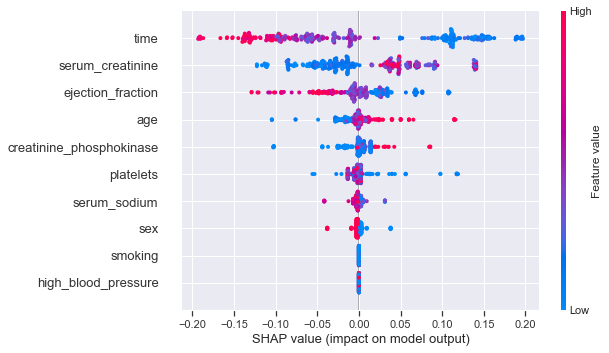

In [51]:
shap.summary_plot(shap_values, features=X_train, max_display=10)

## 4) Predict observations, one for positive and one for negative label, by using all four (4) models and indicate which one gives the better prediction.

In [52]:
y_test.iloc[:5]

206    0
188    0
12     1
219    0
237    0
Name: DEATH_EVENT, dtype: int64

In [53]:
for classifier in classifiers:
    print(classifier)
    print(classifiers[classifier].predict_proba(X_test.iloc[:3,:]))

LogisticRegression
[[0.97544935 0.02455065]
 [0.91316863 0.08683137]
 [0.19851797 0.80148203]]
DecisionTree
[[1. 0.]
 [1. 0.]
 [0. 1.]]
RandomForest
[[1. 0.]
 [1. 0.]
 [0. 1.]]
XGBoost
[[0.54785305 0.45214695]
 [0.54785305 0.45214695]
 [0.45447427 0.5455257 ]]


When it comes to predicting the outcome of the first three instances, logistic regression classifier did a much better job than the other classifiers are accuretely predicting the probabilities of each outcome. In other words, the probabilities were the closest to the real outcomes.